# How many responses per contest?

This notebook will analyze the number of responses/captions per contest, both treating all contest equally and throughout time.

In [1]:
import os
import sys
from pathlib import Path
p = Path(".").absolute()
root = p.parent.parent
sys.path.append(str(root))

In [2]:
import caption_contest_data as ccd

In [3]:
contests = ccd.summary_ids()
print(contests)

{'513_summary_RoundRobin.csv', 520, 521, 522, 523, 524, 526, 527, 528, 529, 530, 531, 532, '512_summary_LilUCB.csv', '508-round2_summary_RoundRobin.csv', 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 554, '515_summary_LilUCB.csv', 555, 556, 557, 553, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, '515_summary_RoundRobin.csv', 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, '509-round1_summary_RoundRobin.csv', 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, '511_summary_LilUCB.csv', 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, '517_summary_RoundRobin.csv', 656, 657, 658, 659, 660, 661, 662, 663, 665, 666, 667, 668, 669, 670, '559_summary_RandomSamping.

In [4]:
len(contests)

193

In [5]:
summaries = [ccd.summary(c) for c in contests]

In [6]:
import pandas as pd
summary = pd.concat(summaries, sort=False)

In [7]:
summary.head()

,rank,funny,somewhat_funny,unfunny,count,score,precision,contest,caption,target_id
0,1,3,1,0,4,2.750000,0.288675,513,They only allow one carry-on.,NaN
1,2,2,1,0,3,2.666667,0.408248,513,I'm a little worried about the revolving door ...,NaN
2,3,3,2,0,5,2.600000,0.244949,513,I want you off the case.,NaN
3,4,3,0,1,4,2.500000,0.500000,513,I started off where you are. And look at me now!,NaN
4,4,2,2,0,4,2.500000,0.288675,513,I'm not sure it's worth it just to be able to ...,NaN


In [8]:
import numpy as np
counts = summary.pivot_table(index="contest", values="count", aggfunc=np.sum)
nunique = summary.pivot_table(index="contest", values="caption", aggfunc=lambda x: x.nunique())
df = pd.merge(counts, nunique, left_index=True, right_index=True)
df["n_unique"] = df["caption"]
df.drop(columns="caption", inplace=True)
df.head()

,count,n_unique
contest,,
508,137868,6778
509,98241,7858
510,82627,3905
511,56660,3325
512,43120,4399


In [9]:
df.index.unique()

Int64Index([508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
            ...
            676, 677, 678, 679, 680, 681, 682, 683, 684, 685],
           dtype='int64', name='contest', length=176)

In [10]:
"{} million human responses".format(df["count"].sum() / 1e6)

'119.157775 million human responses'

In [11]:
"{} captions".format(df["n_unique"].sum())

'970327 captions'

In [12]:
"{} contests".format(len(df))

'176 contests'

Text(0.5, 0, 'Responses (millions)')

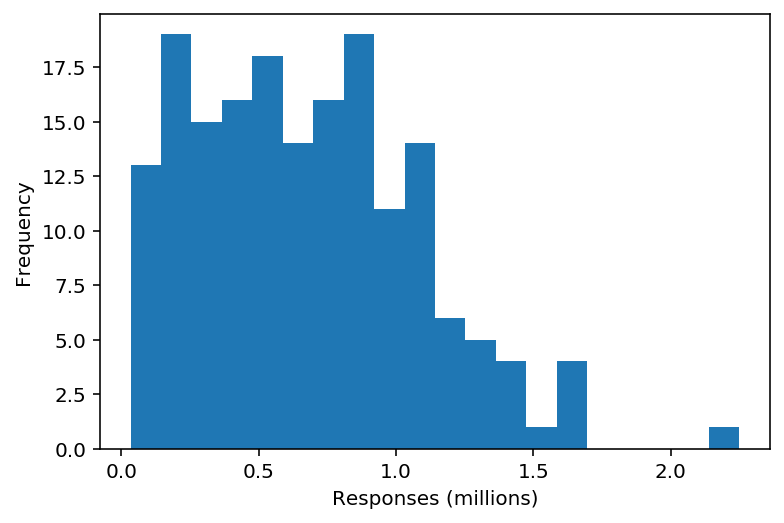

In [13]:
responses = df["count"] / 1e6
ax = responses.plot.hist(bins=20)
ax.set_xlabel("Responses (millions)")

Text(0.5, 0, 'Unique captions')

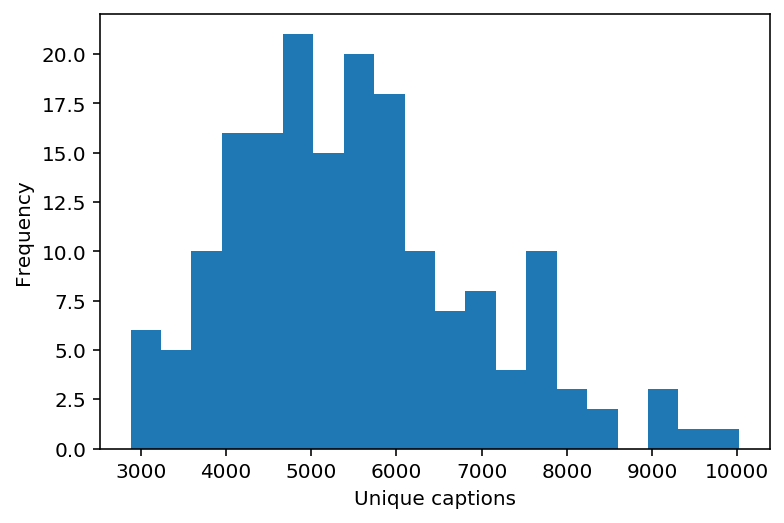

In [14]:
responses = df["n_unique"]
ax = responses.plot.hist(bins=20)
ax.set_xlabel("Unique captions")

Text(0, 0.5, 'Number of responses')

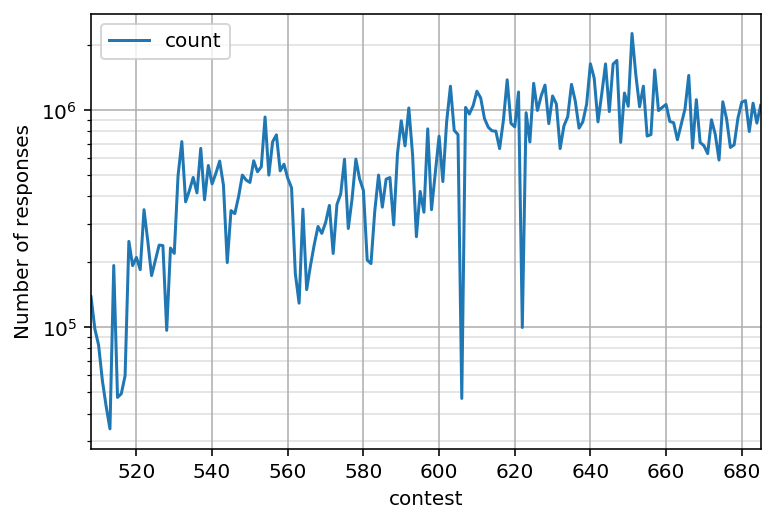

In [15]:
ax = df.reset_index().plot(x="contest", y="count")
ax.set_yscale("log")
ax.grid()
ax.grid(which="minor", alpha=0.4)
ax.set_ylabel("Number of responses")

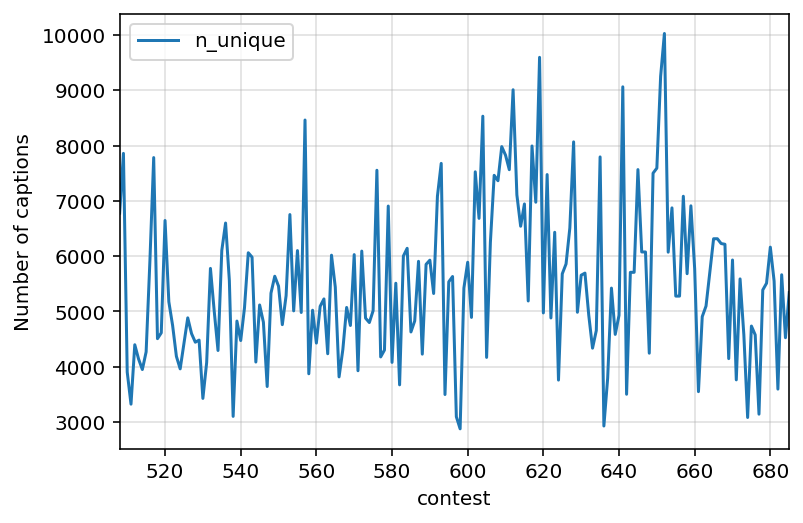

In [16]:
ax = df.reset_index().plot(x="contest", y="n_unique")
ax.set_ylabel("Number of captions")
ax.grid(alpha=0.4)